# Spreading Algorithm

Jupyter notebook `spread.ipynb` is a **freebie** which isn’t essential to running the Pronouns2 Python code. However, it can provide insight into how our _Spreading Algorithm_ ([spread.py](spread.py)) helps to draw Pronouns2’s pretty TikZ chaining diagrams.

Our document `docs/VaryingRho.pdf` goes into greater detail about how this algorithm is used to tune the placement of arrowheads in Pronouns2’s TikZ chaining diagrams.

In [1]:
from pronouns2 import *
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def spread_points(points, rho):
    """
    Spread points more evenly along the perimeter of the unit circle, according
    to given rho in [0.0,1.0] using function "spread" defined by pronouns2's
    Python module spread.py .

    Args:
        points (list[tuple]): Points on the unit circle,
        rho (float): In [0.0, 1.0] where 0.0 = not spread out,
        1.0 = completely spread out, and any number in between
        = partially spread out

    Returns:
        list[tuple]: New points on the unit circle.
    """
    # Spread out points on unit circle 
    angles = [math.atan2(point[1], point[0]) for point in points]
    new_angles = spread(angles, rho)
    new_points = [(math.cos(new_angle), math.sin(new_angle)) for new_angle in new_angles]
    return new_points

In [3]:
def plot_spreading(old_points, new_points):
    """
    Create a side-by-side plot comparing original and spread points.
    
    Args:
        original_points: array-like of shape (n, 2) containing original points
        spread_points: array-like of shape (n, 2) containing spread points
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    avg_point = spread_average_point(old_points)
    plot_helper(ax1, old_points, avg_point, 'Original Points')
    plot_helper(ax2, new_points, avg_point, 'Spread Points')
    
    plt.tight_layout()
    return plt

In [4]:
def plot_helper(ax, points, avg_point, title):
    """
    Helper function for plotting points on a unit circle in a given subplot.
    
    Args:
        ax: matplotlib subplot axis
        points: array-like of shape (n, 2) containing points (x,y) on unit circle
        avg_point: Average point of original points (not necessarily the input points).
        title: string for subplot title
    """
    points = np.array(points)
    
    # Plot circle and points
    circle = plt.Circle((0, 0), 1, fill=False, color='blue')
    ax.add_artist(circle)
    ax.scatter(points[:, 0], points[:, 1], color='red', label='Points')
    ax.scatter(avg_point[0], avg_point[1], color='green', s=100, 
              marker='*', label='Average Point')
    
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend()
    ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)

In [5]:
def test_example():
    """Original example test case"""
    points = [(-0.6, 0.8), (0.6, 0.8)]
    rho = 0.25
    new_points = spread_points(points, rho)
    plot_spreading(points, new_points)
    plt.suptitle("Example Test Case")
    plt.show()

def test_ordinary():
    """Test with well-distributed points where average falls between two distinct points"""
    # Create points with clear gaps and average point between two points
    points = [(-.829, .559), (-.229, .973), (.719, .695), (.134, .991), (-.49 , .872)]
    rho = 0.5
    new_points = spread_points(points, rho)
    plot_spreading(points, new_points)
    plt.suptitle("Ordinary Case: Average Between Distinct Points")
    plt.show()

def test_coincident():
    """Test with coincident points, including both even and odd cases"""
    # Create two test cases: even and odd coincident points
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
    
    # Even case: two coincident points
    points_even = [(1, 0), (1, 0), (0.707, 0.707), (1, 0)]
    rho = 0.5
    new_points_even = spread_points(points_even, rho)
    
    # Odd case: three coincident points
    points_odd = [(1, 0), (1, 0), (1, 0), (0.707, 0.707), (-1, 0)]
    new_points_odd = spread_points(points_odd, rho)
    
    # Plot even case
    avg_point = spread_average_point(points_even)
    plot_helper(ax1, points_even, avg_point, "Original (Even Coincident)")
    plot_helper(ax2, new_points_even, avg_point, "Spread (Even Coincident)")
    
    # Plot odd case
    avg_point = spread_average_point(points_odd)
    plot_helper(ax3, points_odd, avg_point, "Original (Odd Coincident)")
    plot_helper(ax4, new_points_odd, avg_point, "Spread (Odd Coincident)")
    
    plt.suptitle("Coincident Points Tests")
    plt.tight_layout()
    plt.show()

def test_boundary_average():
    """Test cases where average point is at extremes"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
    
    # Case where average is before first point
    points_early = [(0.5, 0.866), (0.866, 0.5), (1, 0), (0.866, -0.5)]
    rho = 0.5
    new_points_early = spread_points(points_early, rho)
    
    # Case where average is after last point
    points_late = [(-0.5, 0.866), (-0.866, 0.5), (-1, 0), (-0.866, -0.5)]
    new_points_late = spread_points(points_late, rho)
    
    # Plot early average case
    avg_point = spread_average_point(points_early)
    plot_helper(ax1, points_early, avg_point, "Original (Early Average)")
    plot_helper(ax2, new_points_early, avg_point, "Spread (Early Average)")
    
    # Plot late average case
    avg_point = spread_average_point(points_late)
    plot_helper(ax3, points_late, avg_point, "Original (Late Average)")
    plot_helper(ax4, new_points_late, avg_point, "Spread (Late Average)")
    
    plt.suptitle("Boundary Average Point Tests")
    plt.tight_layout()
    plt.show()

def test_different_rhos():
    """Test the effect of different rho values"""
    points = [(-.28 , .96 ), (.388, .922), (.092, .996), (.301, .954), (.456, .89 ), (-.358, .934)]
    rhos = [0.1*i for i in range(10)]
    avg_point = spread_average_point(points)

    fig, axes = plt.subplots(5, 2, figsize=(12, 20))
    axes = axes.ravel()

    for i, rho in enumerate(rhos):
        new_points = spread_points(points, rho)
        plot_helper(axes[i], new_points, avg_point, f"rho = {rho:.2f}")
    
    plt.suptitle("Effect of Different rho Values")
    plt.tight_layout()
    plt.show()

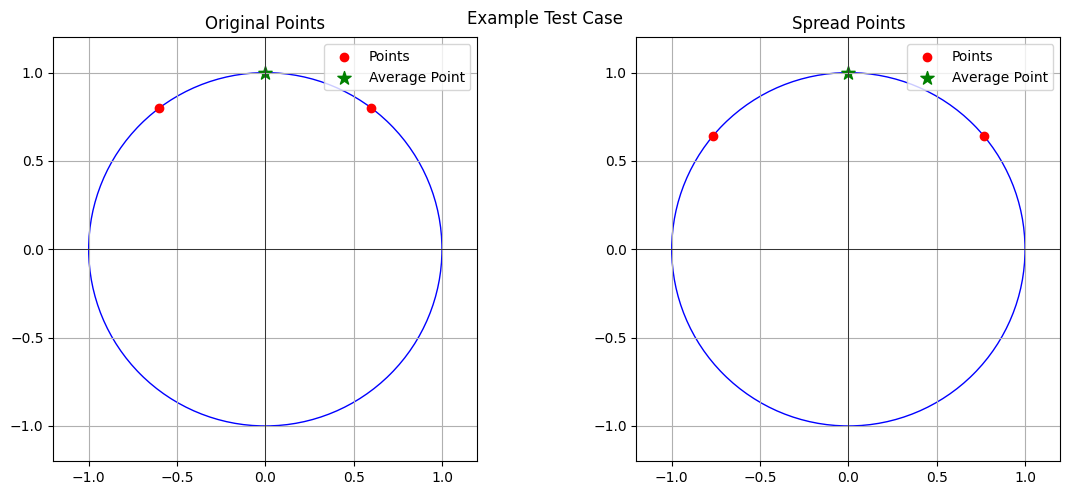

In [6]:
test_example()

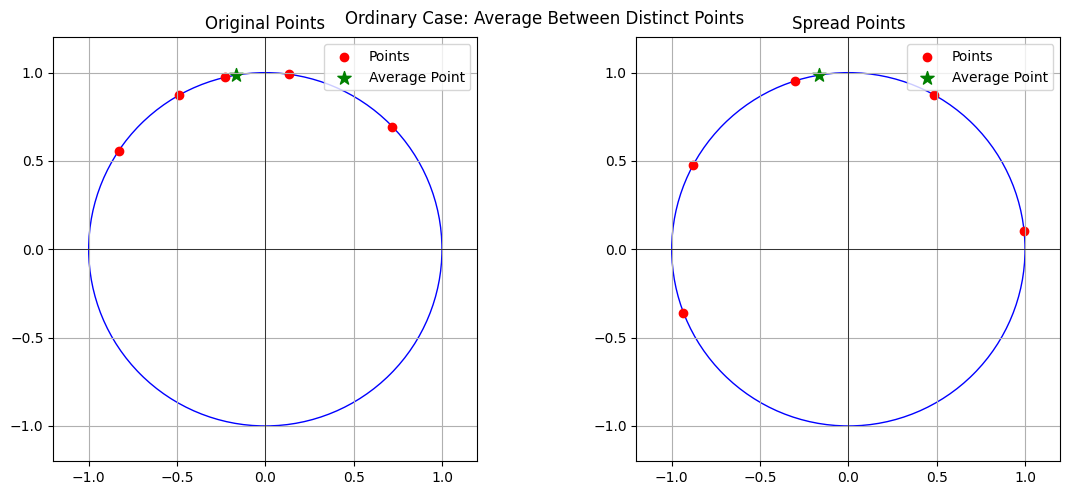

In [7]:
test_ordinary()

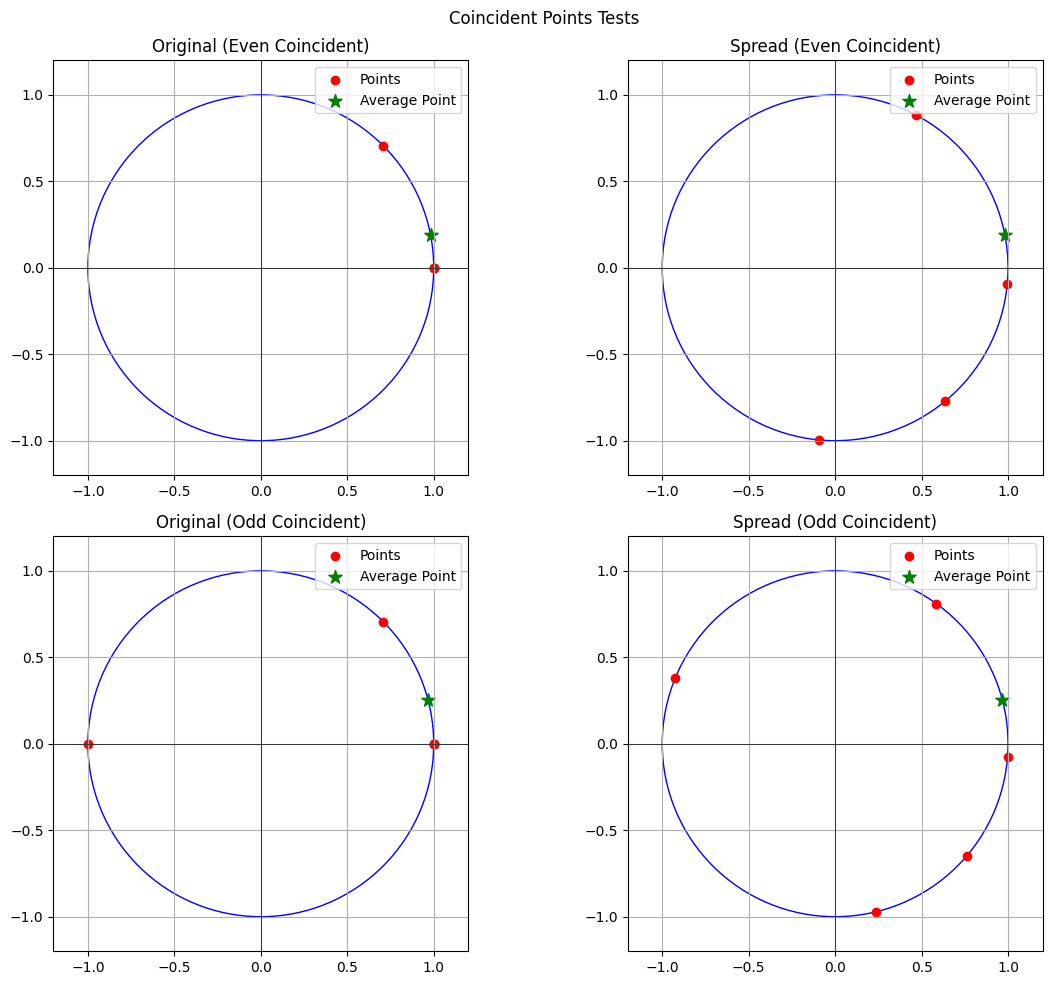

In [8]:
test_coincident()

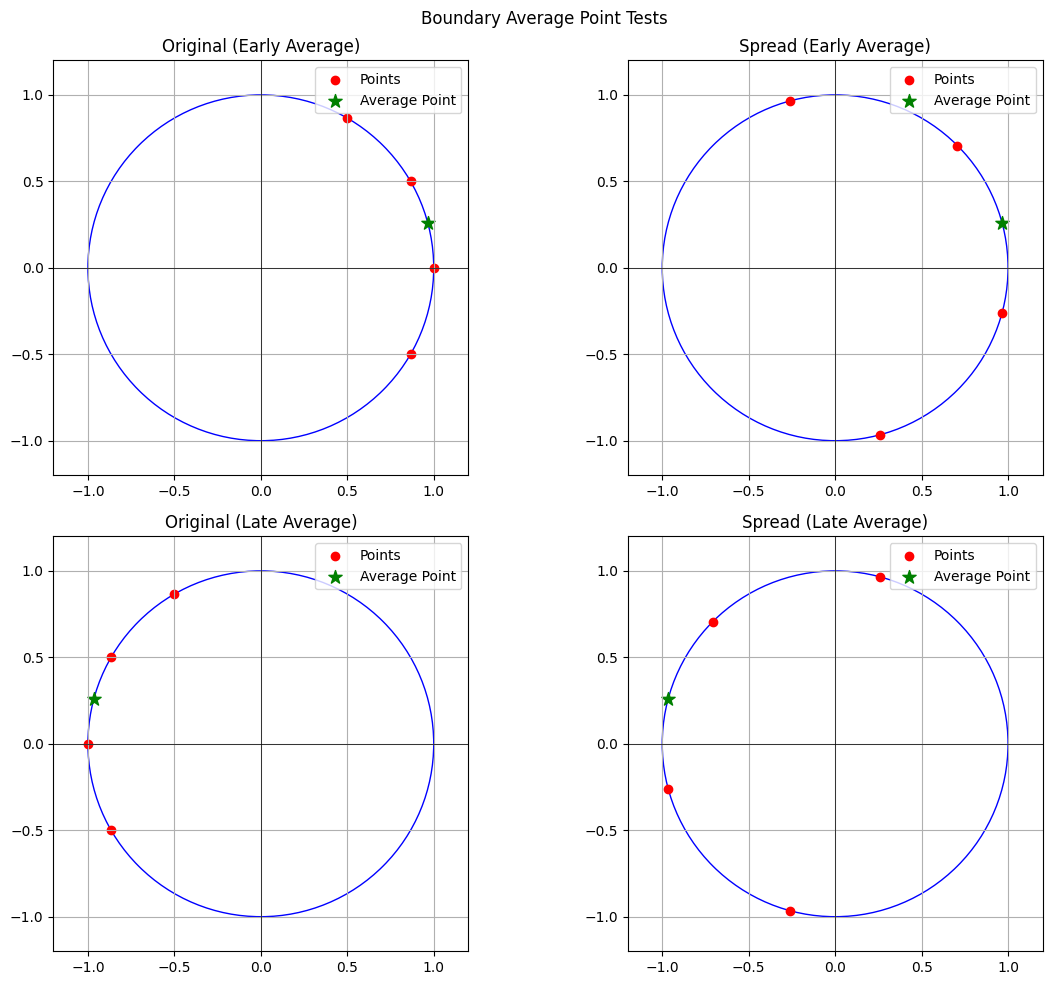

In [9]:
test_boundary_average()

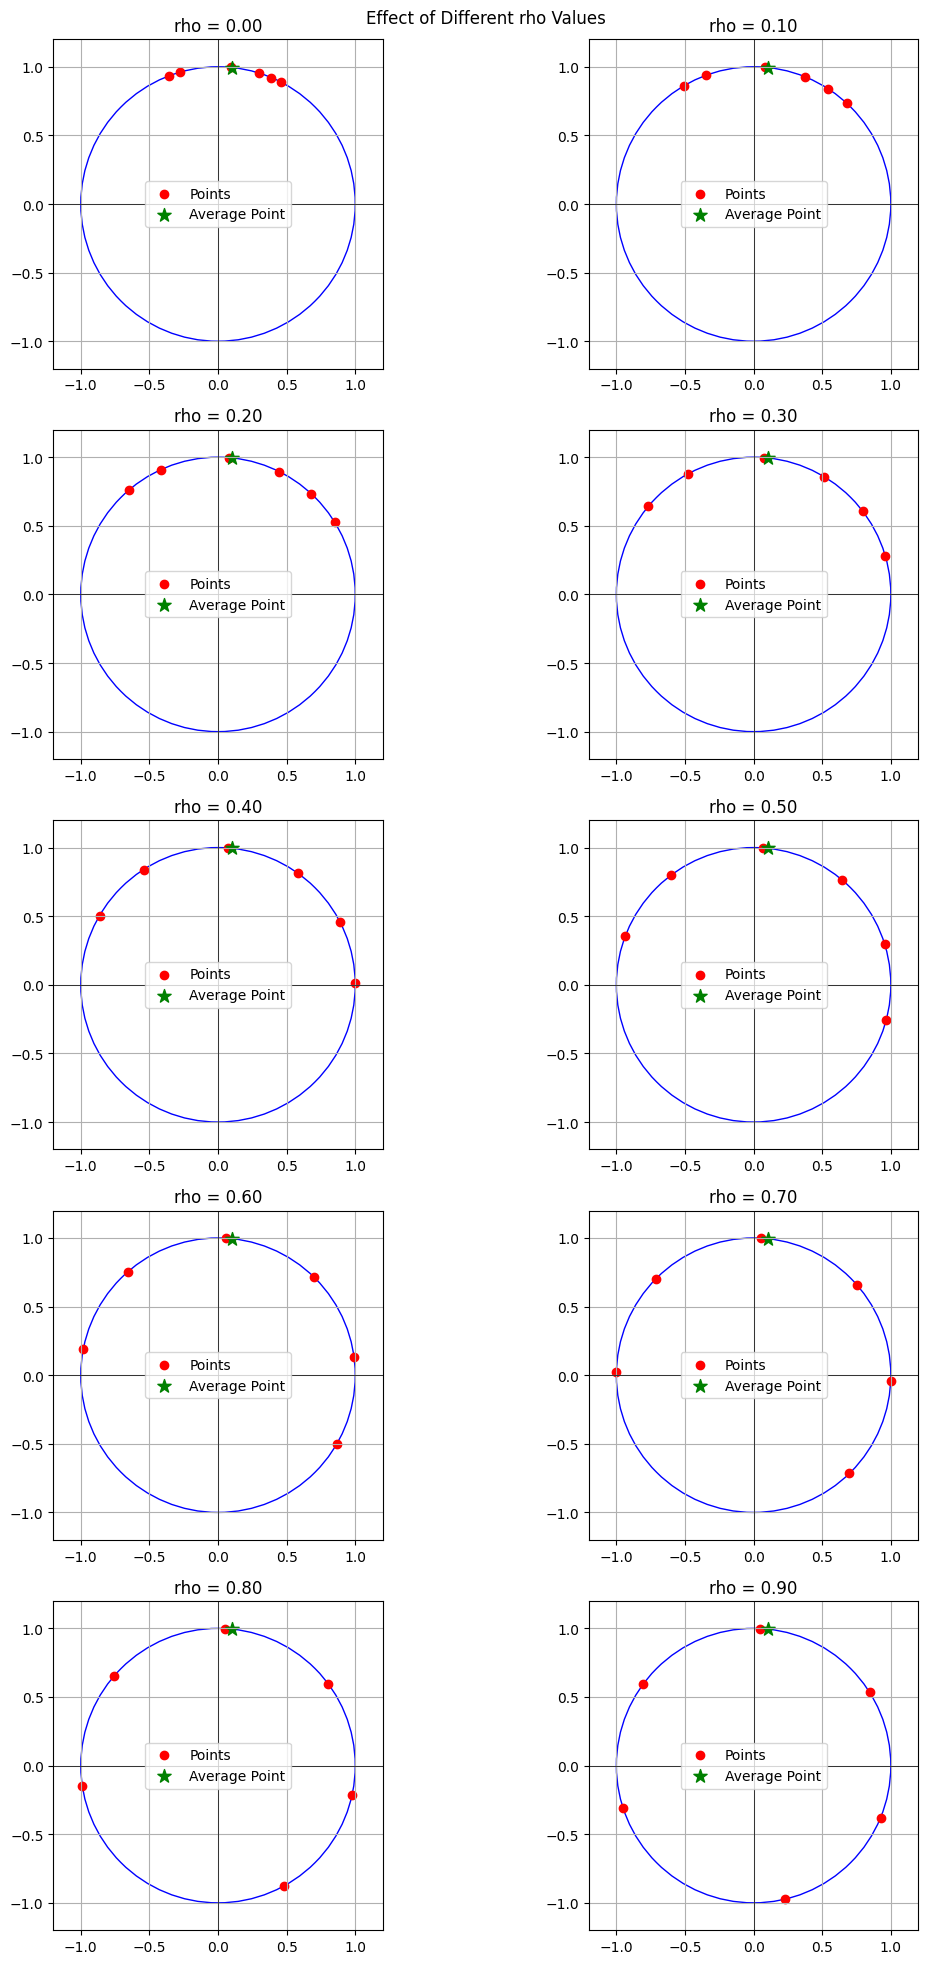

In [10]:
test_different_rhos()

In [11]:
def test_spread2():
    points = [(0.8660254037844387, 0.5), (0.0, 1.0)]
    delta = 1.5707963267948941
    new_points = spread_points(points, delta)
    plot_spreading(points, new_points)
    plt.suptitle("Ordinary Case: Average Between Distinct Points")
    plt.show()

def test_spread3():
    points = [(0.8660254037844387, 0.5), (0.0, 1.0), (-0.5, 0.8660254037844388)]
    delta = 1.047197551196596
    new_points = spread_points(points, delta)
    plot_spreading(points, new_points)
    plt.suptitle("Ordinary Case: Average Between Distinct Points")
    plt.show()

def test_spread4():
    points = [(0.8660254037844387, 0.5), (0.5, 0.8660254037844386), (0.0, 1.0), (-0.5, 0.8660254037844388)]
    delta = 0.7853981633974471
    new_points = spread_points(points, delta)
    plot_spreading(points, new_points)
    plt.suptitle("Ordinary Case: Average Between Distinct Points")
    plt.show()

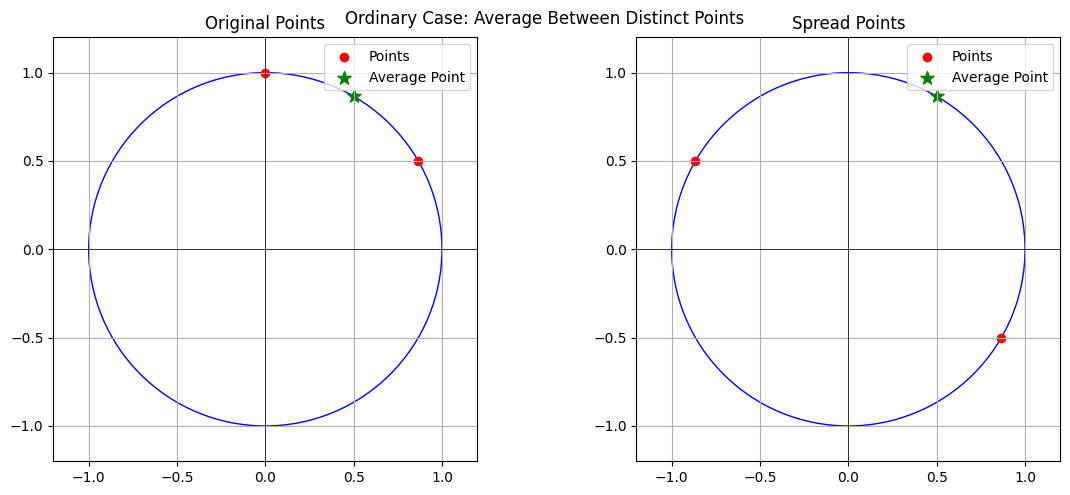

In [12]:
test_spread2()

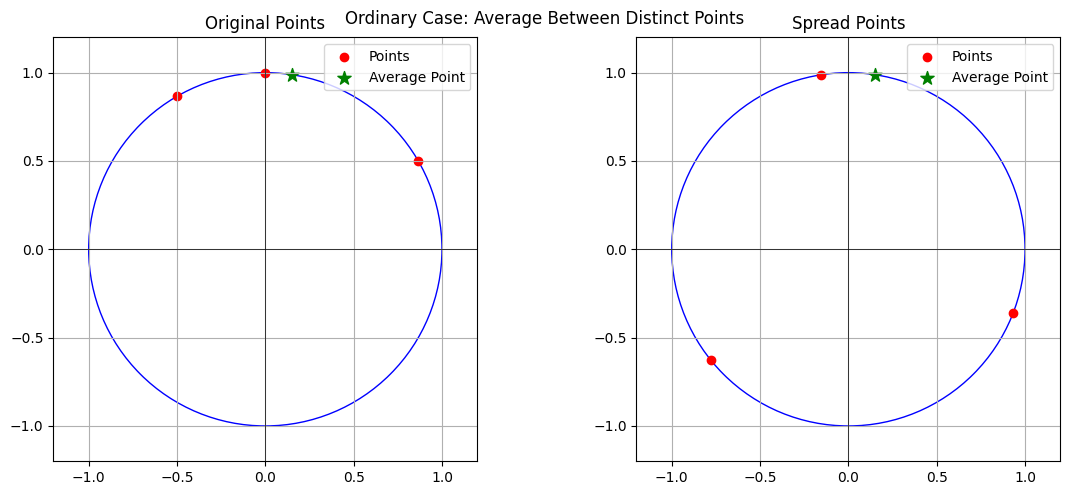

In [13]:
test_spread3()

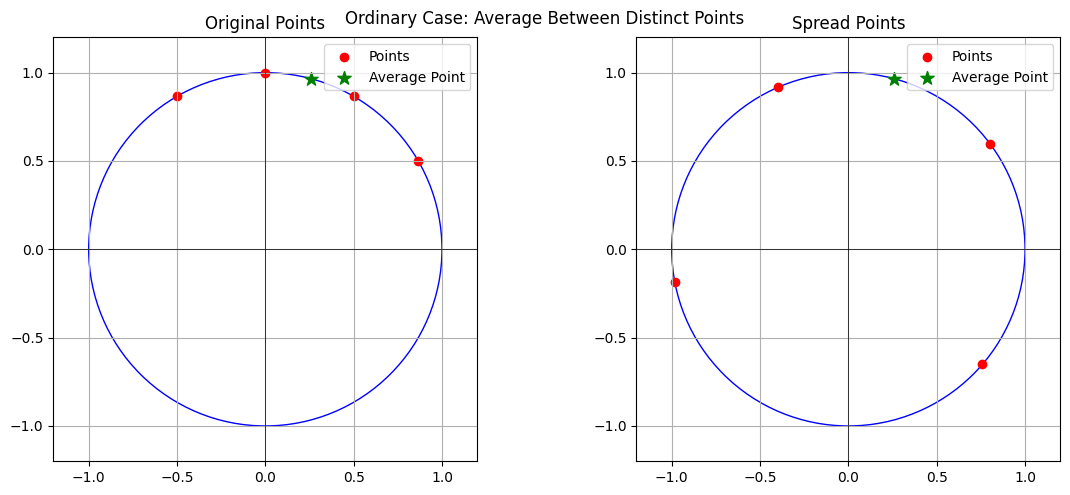

In [14]:
test_spread4()